## LSTM Neural network without class balance
**author** : Chandana Chaudhry


There are two main types of language models: *statistical models* and *neural models*. Here, we will only focus on neural network approaches to developing a language model. So far in our coverage of neural networks we have seen Fully-Connected Neural Networks (FNN) as well as Convolutional Neural Networks (CNN). These were powerful architectures, but neither work well on sequential data where the ordering of inputs matter.

Here are two key architectures that are used for in language modeling:

* **Recurrent neural networks (RNNs)**: RNNs are able to take the order of the input data into account. This ability makes them well-suited for tasks such as text classification and natural language generation.

* **Self-attention and transformer networks**: Self-attention and transformer networks are able to learn long-range dependencies in the input data. This ability makes them well-suited for tasks such as machine translation and question answering.


`LSTM`: _Long-Short Term Memory_ units (introduced by [Hochreiter & Schmidhuber, 1997.](https://dl.acm.org/doi/10.1162/neco.1997.9.8.1735)) which improve on simple RNNs with advanced long-term memory updates;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_neural = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df_neural.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


- **Tokenization and Padding**:

The text data ('Review Text') is tokenized using Tokenizer and converted into sequences of integers using texts_to_sequences().
Sequences are padded to ensure that they are of equal length using pad_sequences().
- **One-Hot Encoding**:

The target variable ('Sentiment') is one-hot encoded using pd.get_dummies().
Training Word2Vec Model:

- The text data is split into individual words, and a Word2Vec model is trained using Word2Vec.

In [ ]:
# Filter out missing values and select relevant columns
df_neural = df_neural.dropna(subset=['Review Text', 'Rating'])
df_neural= df_neural[['Review Text', 'Rating']]

# Define target variable (positive sentiment for ratings 4 and 5, neutral for rating 3, negative for ratings 1 and 2)
df_neural['Sentiment'] = np.where(df_neural['Rating'] >= 4, 'positive', np.where(df_neural['Rating'] == 3, 'neutral', 'negative'))


In [ ]:
df_neural.head()

,Review Text,Rating,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,positive
1,Love this dress! it's sooo pretty. i happene...,5,positive
2,I had such high hopes for this dress and reall...,3,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive
4,This shirt is very flattering to all due to th...,5,positive


###**Building the LSTM Model**:

- A Sequential model is initialized.
An embedding layer is added with pre-trained Word2Vec embeddings.
Multiple LSTM layers are added with dropout regularization.
Dense layers with activation functions are added for classification.
Compiling the Model:

- The model is compiled with categorical crossentropy loss and Adam optimizer.
Training the Model:

- The model is trained using fit(), with class weights applied to handle class imbalance.
Evaluating the Model:

- The trained model is evaluated on the test data, and test loss and accuracy are printed.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Tokenization
max_words = 10000  # Maximum number of words to keep
maxlen = 100  # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_neural['Review Text'])
X = tokenizer.texts_to_sequences(df_neural['Review Text'])
X = pad_sequences(X, maxlen=maxlen)
y = df_neural['Sentiment']

In [ ]:

# Get word counts
word_counts = tokenizer.word_counts

# Sort word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most occurring tokens
print("Top 10 Most Occurring Tokens:")
for word, count in sorted_word_counts[:20]:
    print(f"{word}: {count}")

Top 10 Most Occurring Tokens:
the: 76164
i: 59314
and: 49009
a: 43017
it: 42817
is: 30640
this: 25762
to: 24577
in: 20722
but: 16555
on: 15328
for: 13999
of: 13428
with: 12801
was: 12221
so: 12023
my: 11027
dress: 10555
not: 9798
that: 9559


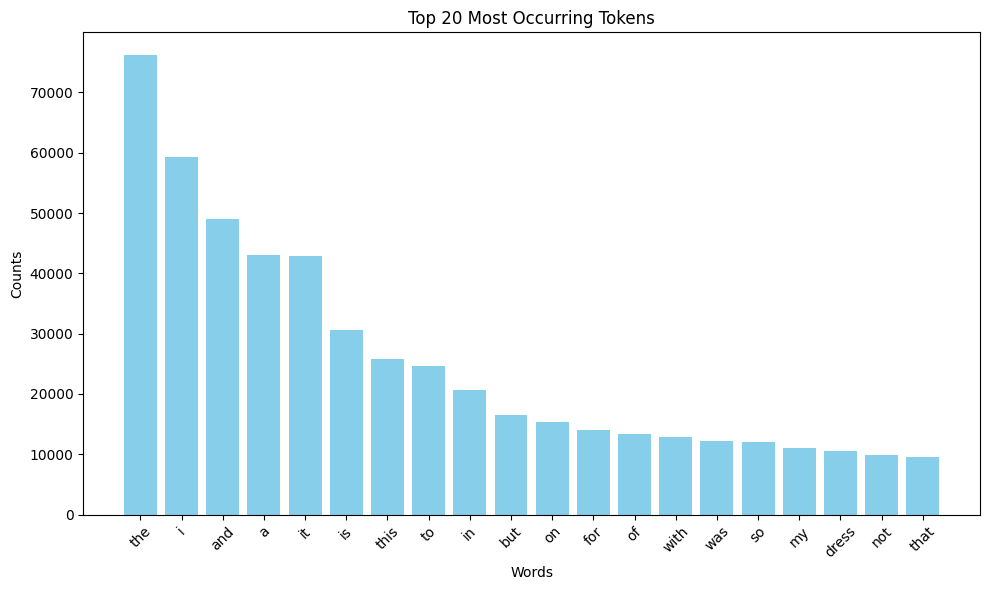

In [ ]:
# Extract top 10 most occurring tokens and their counts
top_words = [word for word, count in sorted_word_counts[:20]]
top_counts = [count for word, count in sorted_word_counts[:20]]

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='skyblue')
plt.title('Top 20 Most Occurring Tokens')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

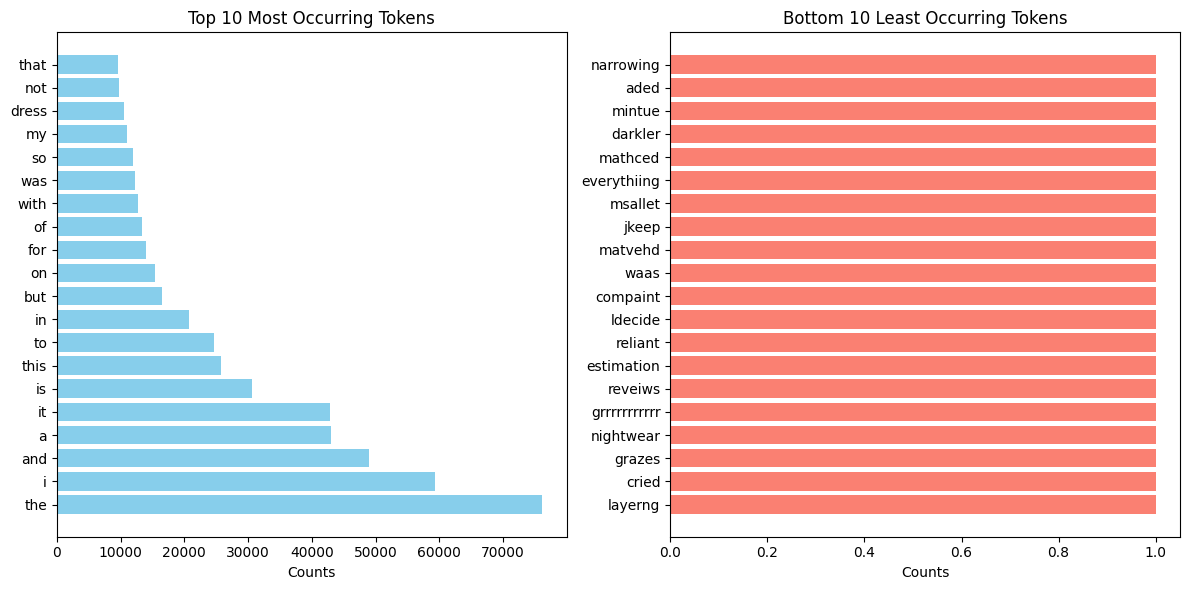

In [ ]:
# Sort word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1])

# Extract top 10 most occurring tokens and their counts
top_words = [word for word, count in sorted_word_counts[-20:]]
top_counts = [count for word, count in sorted_word_counts[-20:]]

# Extract bottom 10 least occurring tokens and their counts
bottom_words = [word for word, count in sorted_word_counts[:20]]
bottom_counts = [count for word, count in sorted_word_counts[:20]]

# Plot bar graph for top words
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_words, top_counts, color='skyblue')
plt.title('Top 10 Most Occurring Tokens')
plt.xlabel('Counts')
plt.gca().invert_yaxis()

# Plot bar graph for bottom words
plt.subplot(1, 2, 2)
plt.barh(bottom_words, bottom_counts, color='salmon')
plt.title('Bottom 10 Least Occurring Tokens')
plt.xlabel('Counts')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
len(X)

22641

In [ ]:
len(y)

22641

In [ ]:
# Convert sentiment labels to one-hot encoding
y = pd.get_dummies(y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define the LSTM model
embedding_dim = 50  # Dimensionality of the embedding space
vocab_size = min(max_words, len(tokenizer.word_index) + 1)
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for 3 sentiment classes

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/10
453/453 [==============================] - 140s 290ms/step - loss: 0.5580 - accuracy: 0.7843 - val_loss: 0.4440 - val_accuracy: 0.8076
Epoch 2/10
453/453 [==============================] - 130s 286ms/step - loss: 0.4051 - accuracy: 0.8261 - val_loss: 0.4371 - val_accuracy: 0.8178
Epoch 3/10
453/453 [==============================] - 132s 291ms/step - loss: 0.3518 - accuracy: 0.8462 - val_loss: 0.4398 - val_accuracy: 0.8101
Epoch 4/10
453/453 [==============================] - 130s 287ms/step - loss: 0.3043 - accuracy: 0.8629 - val_loss: 0.4894 - val_accuracy: 0.8026
Epoch 5/10
453/453 [==============================] - 129s 285ms/step - loss: 0.2722 - accuracy: 0.8812 - val_loss: 0.5956 - val_accuracy: 0.8062


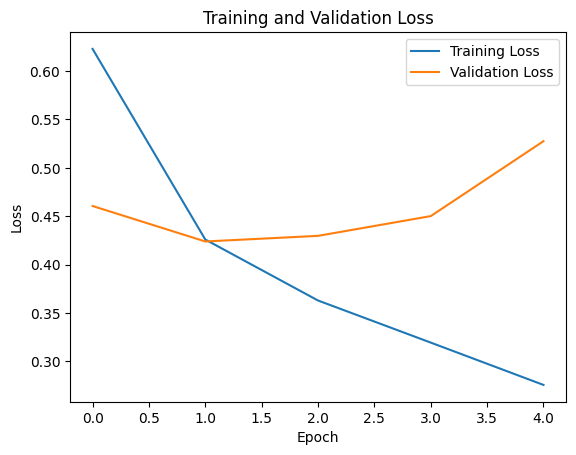

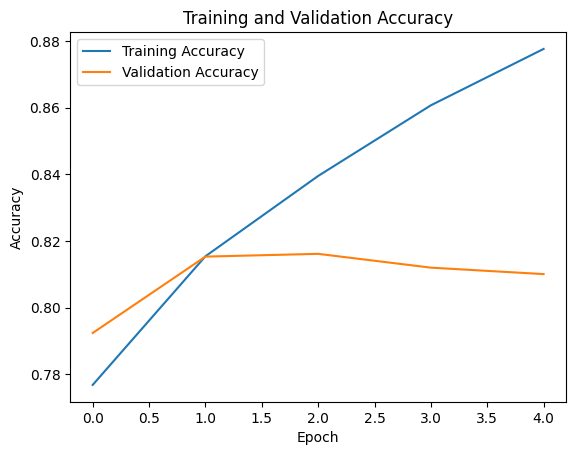

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Test the model on new data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

142/142 [==============================] - 5s 34ms/step - loss: 0.4410 - accuracy: 0.8125
Test Loss: 0.44100916385650635
Test Accuracy: 0.8125414252281189


### Test Accuracy : 81.25%

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size= 100, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/5
145/145 [==============================] - 72s 428ms/step - loss: 0.1169 - accuracy: 0.9581 - val_loss: 1.0187 - val_accuracy: 0.7907
Epoch 2/5
145/145 [==============================] - 62s 427ms/step - loss: 0.0966 - accuracy: 0.9663 - val_loss: 1.0301 - val_accuracy: 0.7911
Epoch 3/5
145/145 [==============================] - 63s 432ms/step - loss: 0.0852 - accuracy: 0.9707 - val_loss: 0.9900 - val_accuracy: 0.7836
Epoch 4/5
145/145 [==============================] - 66s 456ms/step - loss: 0.0778 - accuracy: 0.9733 - val_loss: 1.0518 - val_accuracy: 0.7891
Epoch 5/5
145/145 [==============================] - 62s 430ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 1.1846 - val_accuracy: 0.7880


### Model Evaluation

since we are interested to check how our model is performing, we can feed in some unseen data to check the corrrect and incorrect classifcaion provided by the model.



In [ ]:
#testing the code

In [ ]:
# Preprocess the new review text
new_review = "i have a good life"
new_review_sequence = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_sequence, maxlen=maxlen)

# Predict sentiment using the trained model
predicted_probabilities = model.predict(new_review_padded)

# Convert predicted probabilities to sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']
predicted_sentiment = sentiment_labels[np.argmax(predicted_probabilities)]

print("Predicted Sentiment:", predicted_sentiment)


1/1 [==============================] - 1s 579ms/step
Predicted Sentiment: positive


In [ ]:
# Preprocess the new review text
new_review1 = "I had such high hopes for this dress, but it disapointed"
new_review_sequence1 = tokenizer.texts_to_sequences([new_review1])
new_review_padded1 = pad_sequences(new_review_sequence1, maxlen=maxlen)

# Predict sentiment using the trained model
predicted_probabilities = model.predict(new_review_padded1)

# Convert predicted probabilities to sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']
predicted_sentiment = sentiment_labels[np.argmax(predicted_probabilities)]

print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 40ms/step
Predicted Sentiment: negative


In [ ]:
# Preprocess the new review text
new_review1 = "The dress is alright"
new_review_sequence1 = tokenizer.texts_to_sequences([new_review1])
new_review_padded1 = pad_sequences(new_review_sequence1, maxlen=maxlen)

# Predict sentiment using the trained model
predicted_probabilities = model.predict(new_review_padded1)

# Convert predicted probabilities to sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']
predicted_sentiment = sentiment_labels[np.argmax(predicted_probabilities)]

print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 74ms/step
Predicted Sentiment: positive


**The confusion matrix**
is a table that is often used to describe the performance of a classification model. It compares the actual target values with the values predicted by the model. The rows of the matrix represent the actual classes, and the columns represent the predicted classes.

The main diagonal of the confusion matrix (from top left to bottom right) represents the number of correct predictions for each class. Off-diagonal elements represent instances that are misclassified. The higher the values on the diagonal, the better the model's performance. A perfect classifier would have values only on the diagonal.

142/142 [==============================] - 5s 34ms/step


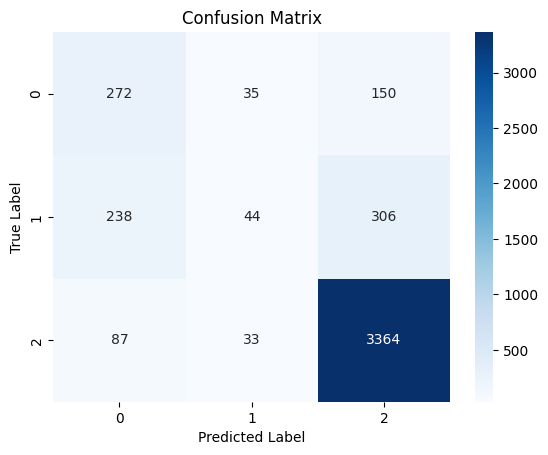

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted sentiment labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test.values, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

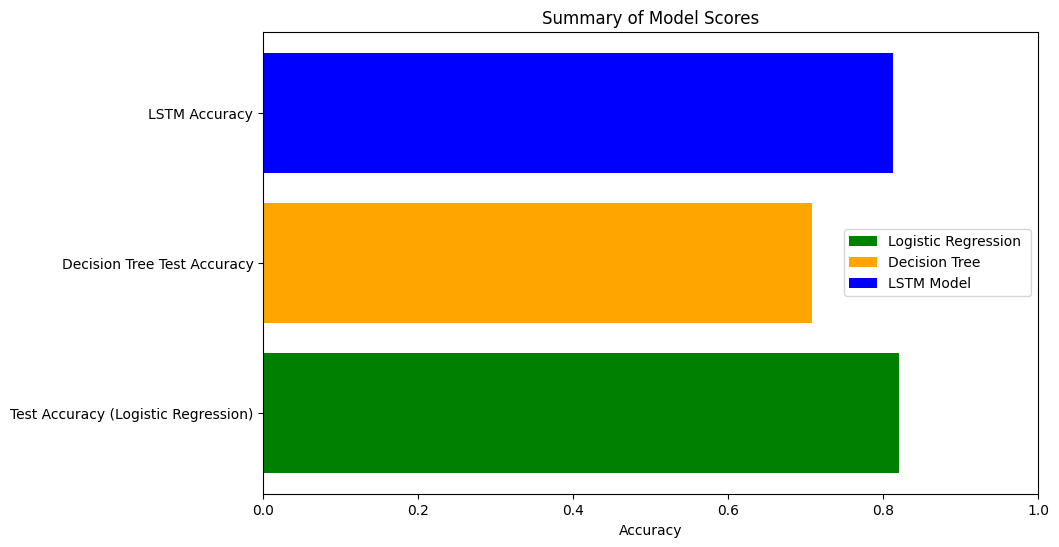

In [ ]:
import matplotlib.pyplot as plt

# Scores
test_accuracy_log_reg = 0.8206422018348624
test_accuracy_decision_tree = 0.7077981651376147
test_accuracy_LSTM_model = 0.8125414252281189

# Plotting
plt.figure(figsize=(10, 6))

# Test Accuracy for Logistic Regression
plt.barh('Test Accuracy (Logistic Regression)', test_accuracy_log_reg, color='green')

# Decision Tree Test Accuracy
plt.barh('Decision Tree Test Accuracy', test_accuracy_decision_tree, color='orange')
# Decision Tree Test Accuracy
plt.barh('LSTM Accuracy', test_accuracy_LSTM_model, color='blue')

# Adding labels and title
plt.xlabel('Accuracy')
plt.title('Summary of Model Scores')
plt.xlim(0, 1)  # Setting x-axis limit from 0 to 1

# Adding legend
plt.legend(['Logistic Regression ', 'Decision Tree', 'LSTM Model'])

# Show plot
plt.show()

###Conclusion
- the model is performing correct in classifying class : positive

- the model is performing correct in classifying class : negative

- the model is performing incorrect in classifying class : Neutral

This means, we need to gather or work on class neutral. Also amongst all three models, logisticregression performs the best